In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
access_token ="890818358962036736-4oIVkRU67cgeZWjvdqV4yj3y0viqzdZ"
access_token_secret = "nmxK6QltJSNWdpSM4RJ8UjomZcqS5Y8BbTqHh7rkUutFs"
consumer_key = "nIxR5nCaf2qy1AIGgMk4D8EBn"
consumer_secret = "sSWD3wvIsky1UMTQgUFfBtve6JjJX12yoUZjzSxiRV4Mj2DqhS"

In [3]:
# Create the authentication object
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)

# Set the access token and access token secret
auth.set_access_token(access_token,access_token_secret)

# Creating the API object while passing in auth information
api = tweepy.API(auth, wait_on_rate_limit = True)

In [4]:
## Removing re-tweets:
search_words = '#AyodhyaRamMandir -filter:retweets AND -filter:replies'
date_since = "2020-08-04"

In [5]:
tweets = tweepy.Cursor(api.search,
                  q = search_words,lang = 'en', since =date_since ,retweeted =False).items(1000)

In [6]:
tweets

In [7]:
tweet_details = [[tweet.created_at, tweet.text, tweet.user.screen_name] for tweet in tweets]

In [8]:
tweet_df = pd.DataFrame(data = tweet_details, columns =['time','text','user'])

In [10]:
tweet_df

,time,text,user
0,2020-08-08 08:35:20,Jai Shree Krishna 🙏 howmuch do u know about #M...,Bengaluruhudugi
1,2020-08-08 08:24:04,Whole team of Pawan's NLT celebrating the joy ...,PawankumarNlp
2,2020-08-08 08:12:48,How many of you Know the issue B/W Hindus and ...,PandeyFC
3,2020-08-08 07:54:02,#AyodhyaRamMandir\n\n'Record 160m watched puja...,DilipDa60259821
4,2020-08-08 07:54:01,What happened to all these motor mouth crooks ...,only_anupam
...,...,...,...
995,2020-08-05 15:08:38,Billboards in USA @realDonaldTrump thank you f...,Nixachar
996,2020-08-05 15:07:45,Heartly congratulations to everyone on this au...,AcvTourism
997,2020-08-05 15:06:09,The nation is indebted to all those who fought...,NVAK1973
998,2020-08-05 15:04:50,Long Wait Has Come To An End\n\nAyodhya Ram Ma...,MeGopiganesh


In [11]:
def clean_tweets(text):
    text = re.sub("RT @[\w]*:","",text)
    text = re.sub("@[\w]*","",text)
    text = re.sub(r"https\S+","",text)
    text = re.sub("\n","",text)
    text = re.sub("#","",text)
    text = re.sub("[!@#$+%*:()'-]","",text)
    return text
  

In [12]:
tweet_df['text'] = tweet_df['text'].apply(lambda x:clean_tweets(x))

In [13]:
## To remove emoji:
tweet_df['text'] = tweet_df['text'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

In [14]:
tweet_df

,time,text,user
0,2020-08-08 08:35:20,Jai Shree Krishna howmuch do u know about Mat...,Bengaluruhudugi
1,2020-08-08 08:24:04,Whole team of Pawans NLT celebrating the joy o...,PawankumarNlp
2,2020-08-08 08:12:48,How many of you Know the issue B/W Hindus and ...,PandeyFC
3,2020-08-08 07:54:02,AyodhyaRamMandirRecord 160m watched pujan live...,DilipDa60259821
4,2020-08-08 07:54:01,What happened to all these motor mouth crooks ...,only_anupam
...,...,...,...
995,2020-08-05 15:08:38,Billboards in USA thank you for respecting ou...,Nixachar
996,2020-08-05 15:07:45,Heartly congratulations to everyone on this au...,AcvTourism
997,2020-08-05 15:06:09,The nation is indebted to all those who fought...,NVAK1973
998,2020-08-05 15:04:50,Long Wait Has Come To An EndAyodhya Ram Mandir...,MeGopiganesh


In [15]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


In [16]:
# Create two new columns 'Subjectivity' & 'Polarity'
tweet_df['Subjectivity'] = tweet_df['text'].apply(getSubjectivity)
tweet_df['Polarity'] = tweet_df['text'].apply(getPolarity)


In [17]:
tweet_df

,time,text,user,Subjectivity,Polarity
0,2020-08-08 08:35:20,Jai Shree Krishna howmuch do u know about Mat...,Bengaluruhudugi,0.216667,0.125000
1,2020-08-08 08:24:04,Whole team of Pawans NLT celebrating the joy o...,PawankumarNlp,0.300000,0.500000
2,2020-08-08 08:12:48,How many of you Know the issue B/W Hindus and ...,PandeyFC,0.416667,0.250000
3,2020-08-08 07:54:02,AyodhyaRamMandirRecord 160m watched pujan live...,DilipDa60259821,0.500000,0.136364
4,2020-08-08 07:54:01,What happened to all these motor mouth crooks ...,only_anupam,0.000000,0.000000
...,...,...,...,...,...
995,2020-08-05 15:08:38,Billboards in USA thank you for respecting ou...,Nixachar,0.500000,0.500000
996,2020-08-05 15:07:45,Heartly congratulations to everyone on this au...,AcvTourism,0.000000,0.000000
997,2020-08-05 15:06:09,The nation is indebted to all those who fought...,NVAK1973,0.100000,0.000000
998,2020-08-05 15:04:50,Long Wait Has Come To An EndAyodhya Ram Mandir...,MeGopiganesh,0.400000,-0.050000


In [38]:
from PIL import Image

In [61]:
## Select image contains white back-ground 
alice_mask = np.array(Image.open("C:/Users/Admin/Downloads/ram.png"))

In [62]:
alice_mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

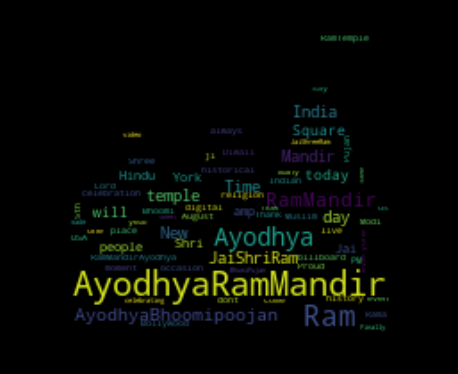

In [82]:
# word cloud visualization
## Collocations = Flase # for removing dupliacations of words

allWords = ' '.join([twts for twts in tweet_df['text']])
wordCloud = WordCloud(width=500, height=300, max_font_size=1500,stopwords=None,
                     normalize_plurals = True,regexp= None , max_words = 200,
                     collocations=False,mask=alice_mask).generate(allWords)

## For increase graph size:
plt.figure(figsize=(10,5), facecolor='k')
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [77]:
plt.savefig("Ram_Mandir.png")

<Figure size 432x288 with 0 Axes>

In [31]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score < 0.2:
    return 'Neutral'
  else:
    return 'Positive'
    
tweet_df['Analysis'] = tweet_df['Polarity'].apply(getAnalysis)

In [32]:
tweet_df

,time,text,user,Subjectivity,Polarity,Analysis
0,2020-08-08 08:35:20,Jai Shree Krishna howmuch do u know about Mat...,Bengaluruhudugi,0.216667,0.125000,Neutral
1,2020-08-08 08:24:04,Whole team of Pawans NLT celebrating the joy o...,PawankumarNlp,0.300000,0.500000,Positive
2,2020-08-08 08:12:48,How many of you Know the issue B/W Hindus and ...,PandeyFC,0.416667,0.250000,Positive
3,2020-08-08 07:54:02,AyodhyaRamMandirRecord 160m watched pujan live...,DilipDa60259821,0.500000,0.136364,Neutral
4,2020-08-08 07:54:01,What happened to all these motor mouth crooks ...,only_anupam,0.000000,0.000000,Neutral
...,...,...,...,...,...,...
995,2020-08-05 15:08:38,Billboards in USA thank you for respecting ou...,Nixachar,0.500000,0.500000,Positive
996,2020-08-05 15:07:45,Heartly congratulations to everyone on this au...,AcvTourism,0.000000,0.000000,Neutral
997,2020-08-05 15:06:09,The nation is indebted to all those who fought...,NVAK1973,0.100000,0.000000,Neutral
998,2020-08-05 15:04:50,Long Wait Has Come To An EndAyodhya Ram Mandir...,MeGopiganesh,0.400000,-0.050000,Negative


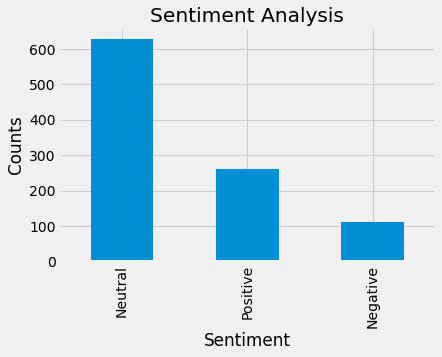

In [33]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweet_df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [34]:
tweet_df.to_csv("RamBhoomi.csv")